# Example Visualize Filters and Feature Maps in Convolutional Neural Networks

In [3]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7
model = EfficientNetB7()
model.summary()

268337152/268326632 [==============================] - 184s 1us/step
Model: "efficientnetb7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 600, 600, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 600, 600, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 600, 600, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (

In [4]:
# summarize feature map shapes
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)

3 stem_conv_pad (None, 601, 601, 3)
4 stem_conv (None, 300, 300, 64)
7 block1a_dwconv (None, 300, 300, 64)
15 block1a_project_conv (None, 300, 300, 32)
17 block1b_dwconv (None, 300, 300, 32)
25 block1b_project_conv (None, 300, 300, 32)
29 block1c_dwconv (None, 300, 300, 32)
37 block1c_project_conv (None, 300, 300, 32)
41 block1d_dwconv (None, 300, 300, 32)
49 block1d_project_conv (None, 300, 300, 32)
53 block2a_expand_conv (None, 300, 300, 192)
56 block2a_dwconv_pad (None, 301, 301, 192)
57 block2a_dwconv (None, 150, 150, 192)
65 block2a_project_conv (None, 150, 150, 48)
67 block2b_expand_conv (None, 150, 150, 288)
70 block2b_dwconv (None, 150, 150, 288)
78 block2b_project_conv (None, 150, 150, 48)
82 block2c_expand_conv (None, 150, 150, 288)
85 block2c_dwconv (None, 150, 150, 288)
93 block2c_project_conv (None, 150, 150, 48)
97 block2d_expand_conv (None, 150, 150, 288)
100 block2d_dwconv (None, 150, 150, 288)
108 block2d_project_conv (None, 150, 150, 48)
112 block2e_expand_conv (None,

In [17]:
lst = [4, 56, 160, 264, 561, 810]#, 153, 257, 406, 554, 748, 806]

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 600, 600, 3)]     0         
                                                                 
 rescaling_7 (Rescaling)     (None, 600, 600, 3)       0         
                                                                 
 normalization_7 (Normalizat  (None, 600, 600, 3)      7         
 ion)                                                            
                                                                 
 stem_conv_pad (ZeroPadding2  (None, 601, 601, 3)      0         
 D)                                                              
                                                                 
 stem_conv (Conv2D)          (None, 300, 300, 64)      1728      
                                                                 
 stem_bn (BatchNormalization  (None, 300, 300, 64)     256 

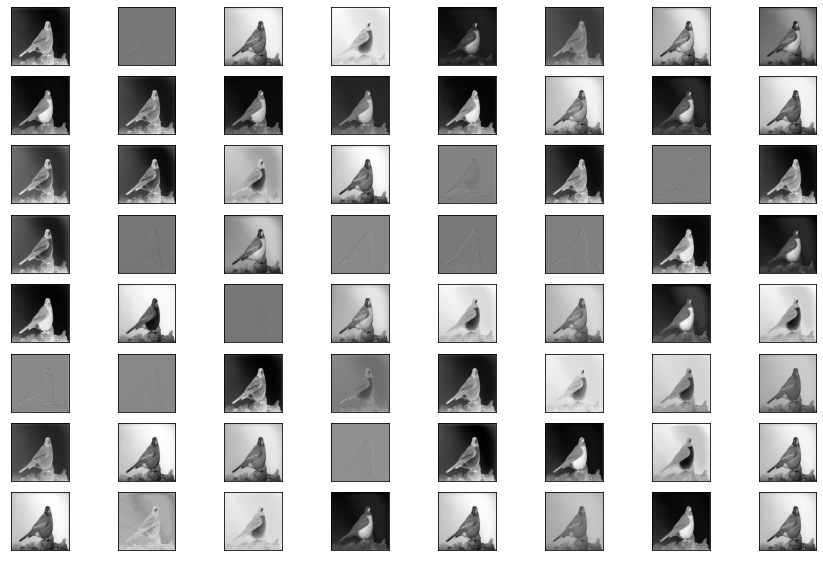

In [15]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from numpy import expand_dims

def display(feature_image):
    plt.figure(figsize=(15, 10))
    square = 8
    ix = 1
    for _ in range(square):
        for _ in range(square):
            ax = plt.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter chanel  in grayscale
            plt.imshow(feature_image[0, :,:, ix-1],cmap = 'gray')
            ix +=1
    # filename= "Image/femp_"
    # plt.savefig(filename+"nam.png")
    plt.show()

def main():
    model = EfficientNetB7()
    model = Model(inputs=model.inputs, outputs=model.layers[4+1].output)
    model.summary()
    img = load_img("ImageInput/bird.jpg", target_size=(600, 600))
    # Convert imge to array
    img = img_to_array(img)
    # expand image dismentio to  "sample" dim.
    img = expand_dims(img, axis=0)
    # scale pixel valye for the vgg 
    img = preprocess_input(img)
    # get feature map for first hiddent layer.
    feature_map = model.predict(img)
    display(feature_map)
if __name__ == "__main__":
    main()

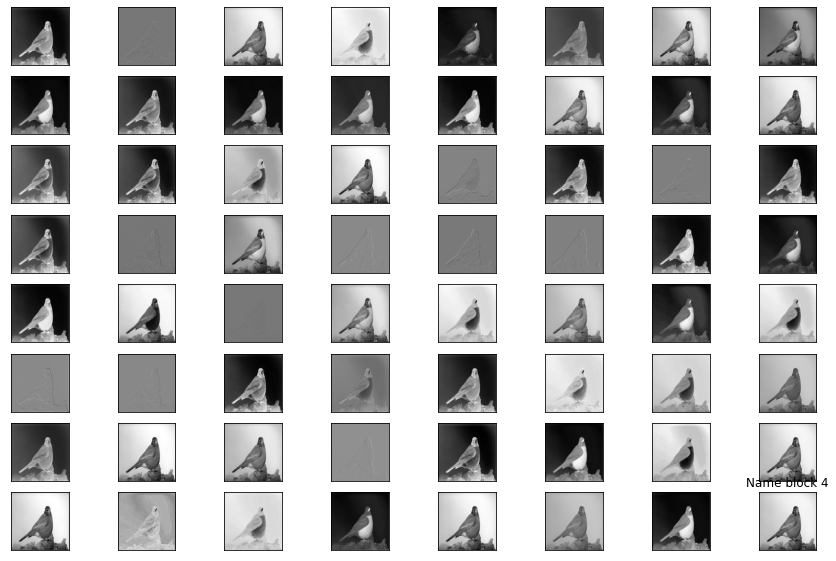

Anh so 4


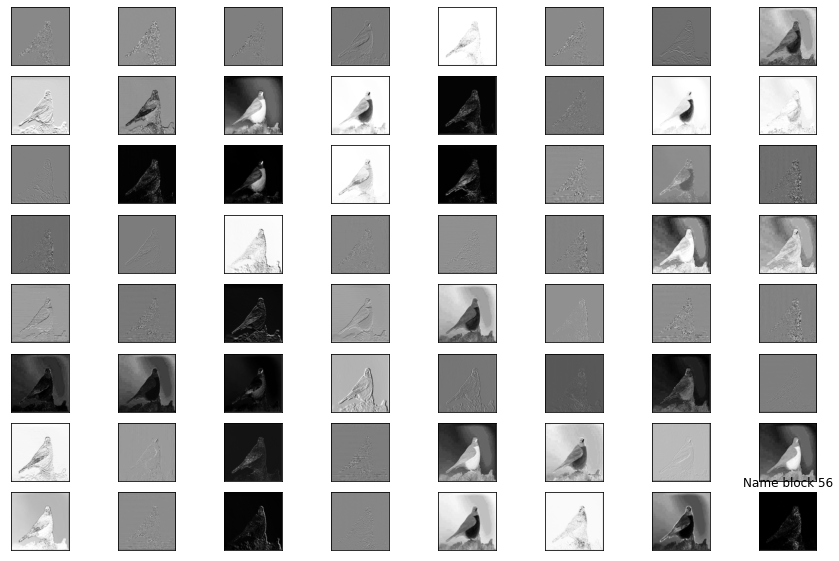

Anh so 56


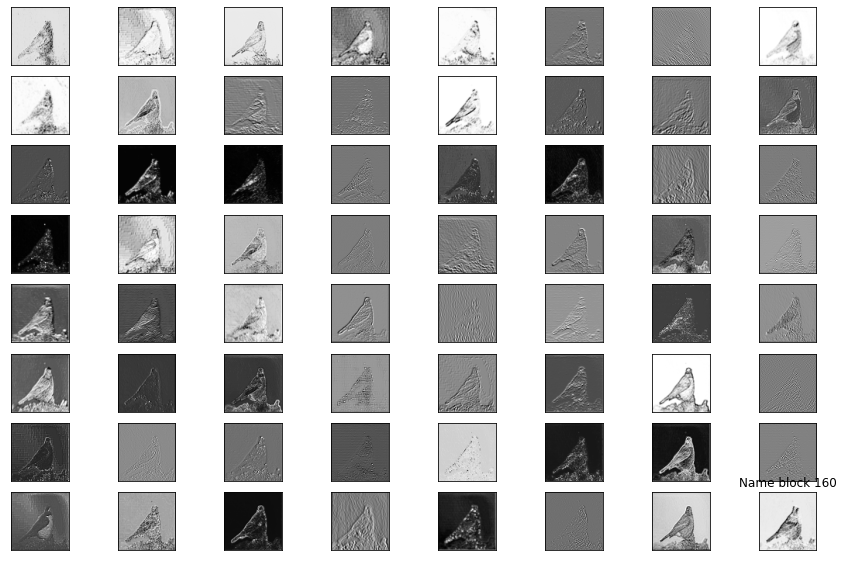

Anh so 160


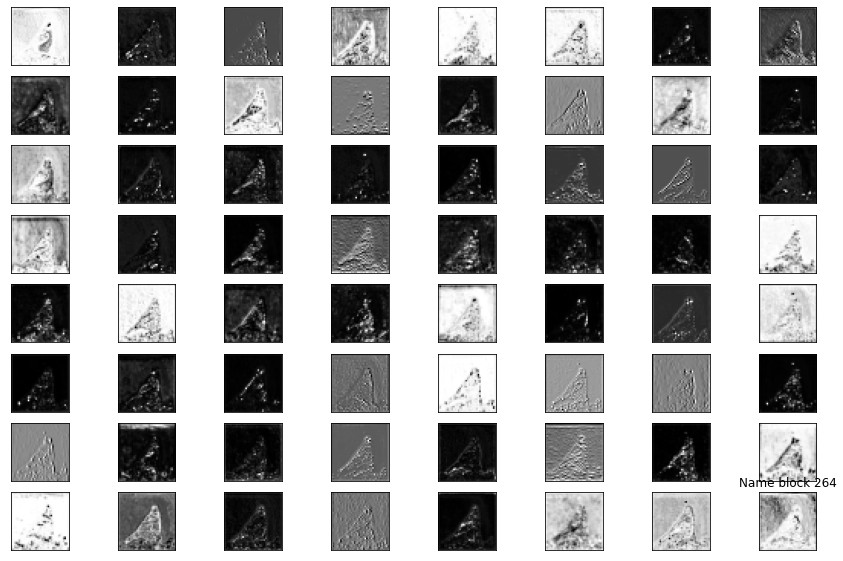

Anh so 264


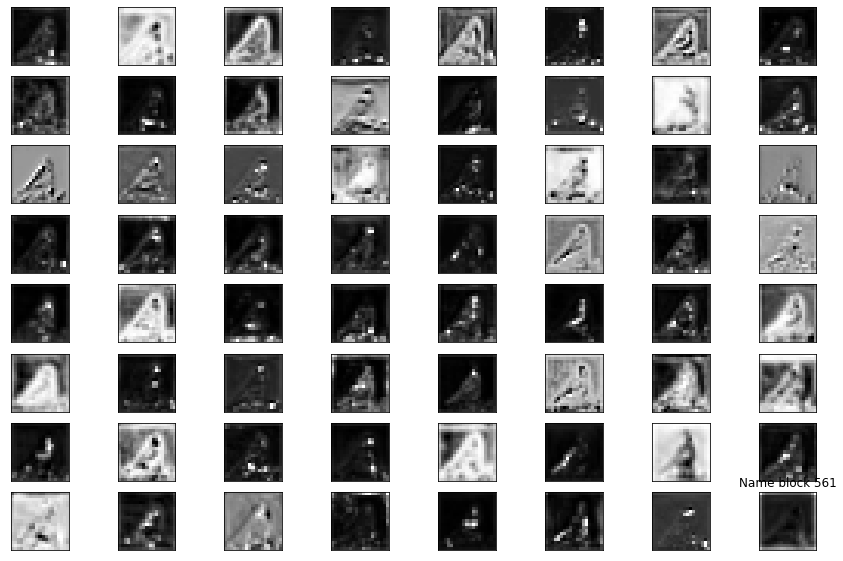

Anh so 561


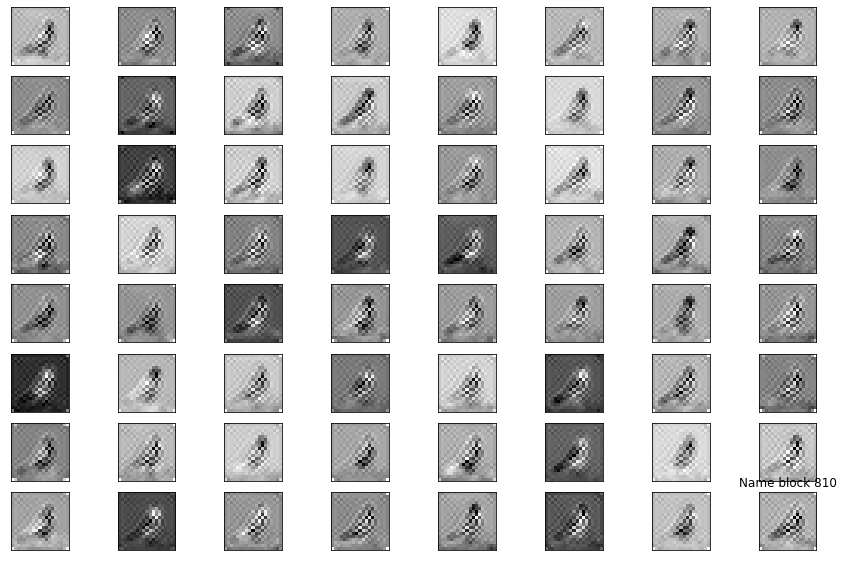

Anh so 810


In [18]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from numpy import expand_dims
import matplotlib.pyplot as plt 

def display(feature_image, name_file):
    plt.figure(figsize=(15, 10))
    square = 8
    ix = 1
    for _ in range(square):
        for _ in range(square):
            ax = plt.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter chanel  in grayscale
            plt.imshow(feature_image[0, :,:, ix-1],cmap = 'gray')
            ix +=1
    # filename= "Image/femp_{}_".format(name_file)
    # plt.savefig(filename+"nam.png")
    plt.title("Name block {}".format(name_file))
    plt.show()

def main():
    model = EfficientNetB7()
    ixs = lst
    outputs = [model.layers[i+1].output for i in ixs]
    model = Model(inputs=model.inputs, outputs=outputs)
    # model.summary()
    img = load_img("ImageInput/bird.jpg", target_size=(600, 600))
    # Convert imge to array
    img = img_to_array(img)
    # expand image dismentio to  "sample" dim.
    img = expand_dims(img, axis=0)
    # scale pixel valye for the vgg 
    img = preprocess_input(img)
    # get feature map for first hiddent layer.
    fe_map = model.predict(img)
    its = 0
    for feature_map in fe_map:
        display(feature_map, ixs[its])
        print("Anh so {}".format(ixs[its]))
        its += 1
if __name__ == "__main__":
    main()